# importing libraries





In [3]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
%matplotlib inline








# loading dataset




In [4]:
df = pd.read_csv('data1.csv')
data = pd.read_csv('data1.csv', index_col='time', parse_dates=['time'], squeeze=True)
data=data.values.reshape(-1, 1) # to make 1D array




# fitting forest isolation




In [5]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
model =  IsolationForest(contamination=0.01)
model.fit(data)
df['anomaly2'] = pd.Series(model.predict(data))





E:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


# visualization




NameError: name 'datt' is not defined

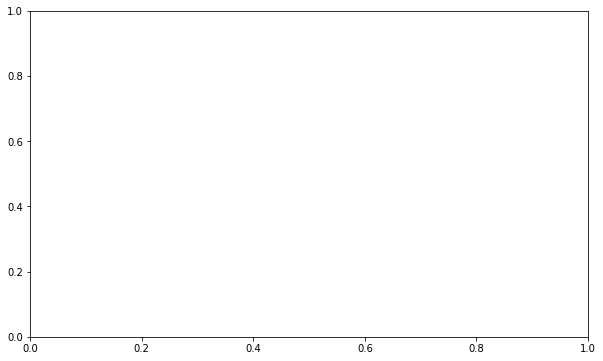

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[datt['anomaly2'] == -1, ['time','level']] #anomaly
ax.plot(df['time'], df['level'], color='blue', label = 'Normal')
ax.scatter(a['time'],a['level'], color='red', label = 'Anomaly')
plt.legend()
plt.show()